# Week3 授業前課題2 住宅価格を予測しよう

# 【課題1】データセットの取得
* pd.read_csv()を使用して、変数に格納

In [37]:
import pandas as pd


# train.csvの読み込み
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 【課題2】データセット自体の調査
- Overview  
アイオワ州エイムズの住宅に対する説明変数と目的変数(各住宅の価格)がセットになっており、説明変数から目的変数を予測することが求められる

- Datafields  
目的変数 SalePrice と79の説明変数が存在する

# 【課題3】データの確認

- 各特徴量がどういったものかを見る。（数値データか文字データなど）

In [2]:
# 情報表示
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

1460行81列からなるデータであることがわかる。(id+説明変数79+目的変数)
<br>
- 今回の目的変数はどの列か確認する。  
→ 課題2で述べた通り、SalePriceが目的変数に該当する  
<br>
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。


In [3]:
# 特徴量の要約統計量（平均、標準偏差など）を取得
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【課題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

- 各特徴量の欠損値の有無を確認する。(missingnoを用いる)  

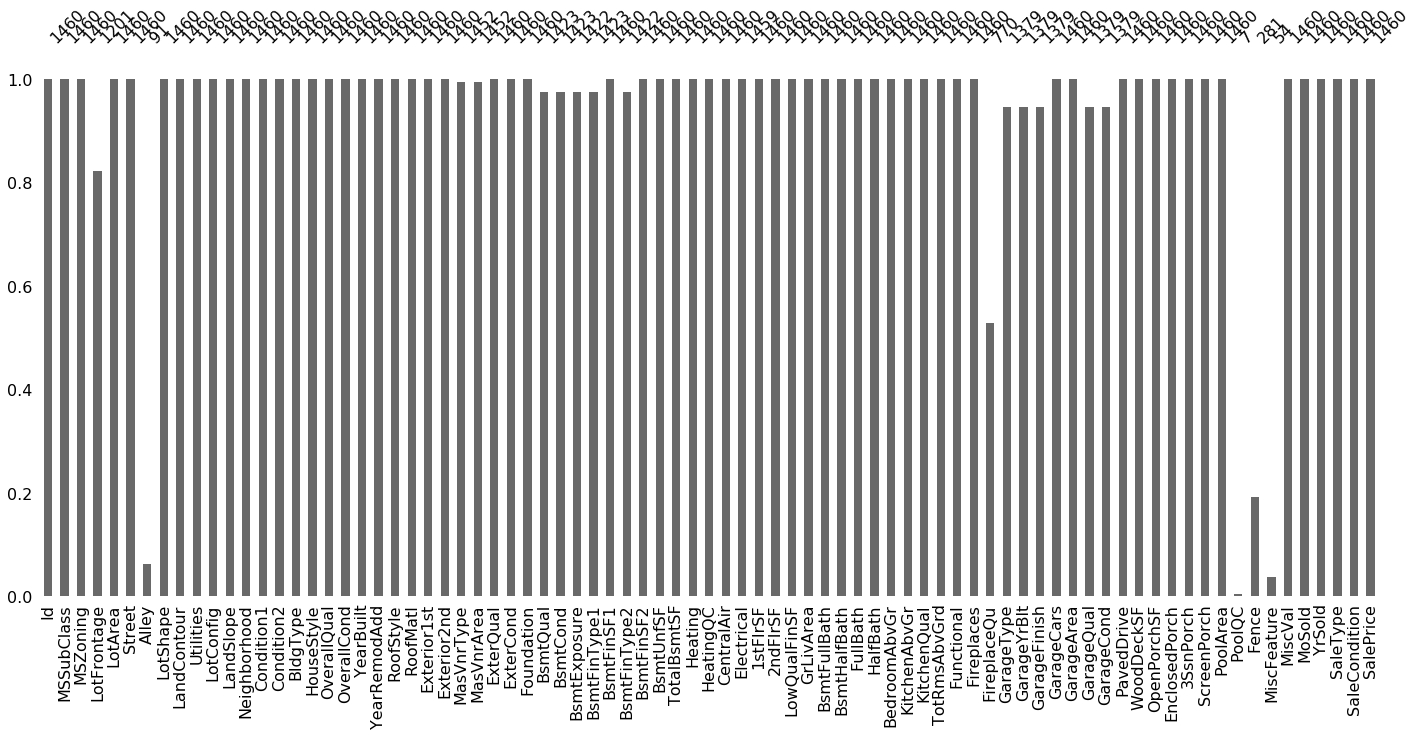

In [39]:
import missingno as msno

# nullの有無を棒グラフで表示、1に満たなければnullが存在する
msno.bar(df_train)

- 欠損値が何パーセント含まれるかを確認する。

In [40]:
# nullをカウント
null_count = df_train.isnull().sum()

# 欠損値の割合を算出
missing_rate = total_null / len(df_train)

#　欠損値のレートを格納
missing_table = pd.DataFrame({
    'null_count': null_count,
    'missing_rate': missing_rate
})

# 欠損レートが高い順にソート
missing_table.sort_values(by = 'missing_rate', ascending = False)

,null_count,missing_rate
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


- 5つ以上欠損値がある特徴量（列）は削除する。

In [41]:
# 列方向のため、axis=1を指定
dropped_df_train = df_train.dropna(axis = 1, thresh = 1455)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- 欠損値があるサンプル（行）は削除する。

In [43]:
dropped_df_train = df_train.dropna()

dropped_df_train.info()
# 全部消えた

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 81 columns):
Id               0 non-null int64
MSSubClass       0 non-null int64
MSZoning         0 non-null object
LotFrontage      0 non-null float64
LotArea          0 non-null int64
Street           0 non-null object
Alley            0 non-null object
LotShape         0 non-null object
LandContour      0 non-null object
Utilities        0 non-null object
LotConfig        0 non-null object
LandSlope        0 non-null object
Neighborhood     0 non-null object
Condition1       0 non-null object
Condition2       0 non-null object
BldgType         0 non-null object
HouseStyle       0 non-null object
OverallQual      0 non-null int64
OverallCond      0 non-null int64
YearBuilt        0 non-null int64
YearRemodAdd     0 non-null int64
RoofStyle        0 non-null object
RoofMatl         0 non-null object
Exterior1st      0 non-null object
Exterior2nd      0 non-null object
MasVnrType       0 non-null object
Mas

# 【課題5】用語の調査
### 尖度  

- 分布が正規分布からどれだけ尖っているかを表す数字
- 正規分布を0とし、尖っている場合は正の値、尖っていなければ負の値になる
- 以下の式のように求められる

$$\frac{n(n+1)}{(n-1)(n-2)(n-3)}\sum_{i=1}^{n}\frac{(x_i - \overline{x})^4}{s^4}-\frac{3(n-1)^2}{(n-2)(n-3)}$$

### 歪度


- 分布が正規分布よりどれだけ歪んでいるか、左右の非対称性を表す数字
- 正規分布を0とし、左に偏った(=右に歪んだ)分布の場合は正の値を、右に偏った(=左に歪んだ)分布の場合は負の値をとる
- 以下の式のように求められる

$$\frac{n}{(n-1)(n-2)}\sum_{i=1}^{n}\Bigl(\frac{x_i - \overline{x}}{s}\Bigr)^3$$

# 【課題6】分布の確認
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

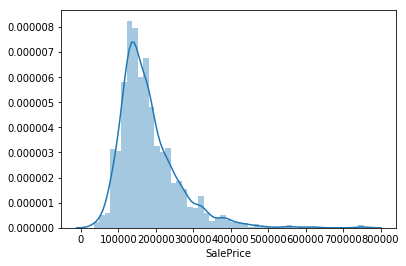

尖度 : 6.536281860064529
歪度 : 1.8828757597682129


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

#目的変数"SalePrice"の分布を表示する
sns.distplot(df_train['SalePrice'])
plt.show()

# 尖度と歪度を算出する
print('尖度 :', df_train['SalePrice'].kurt())
print('歪度 :', df_train['SalePrice'].skew())

- 目的変数に対して対数変換を行う。

In [46]:
import numpy as np

#目的変数に対して対数変換を行う
SalePrice_log = np.log(df_train['SalePrice'])

SalePrice_log

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

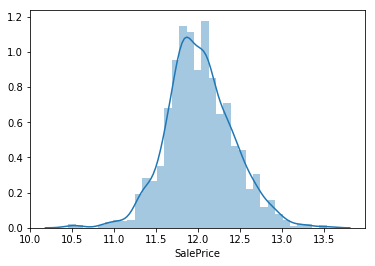

尖度 : 0.8095319958036296
歪度 : 0.12133506220520406


In [10]:
sns.distplot(SalePrice_log)
plt.show()

print('尖度 :', SalePrice_log.kurt())
print('歪度 :', SalePrice_log.skew())

- 対数変換の前後での変化を「正規分布」という言葉を含めて説明  
対数変換を行うことで、分布の形が正規分布に近くなった。尖度・歪度も0に近い値になっている

# 【課題7】相関係数の確認
- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

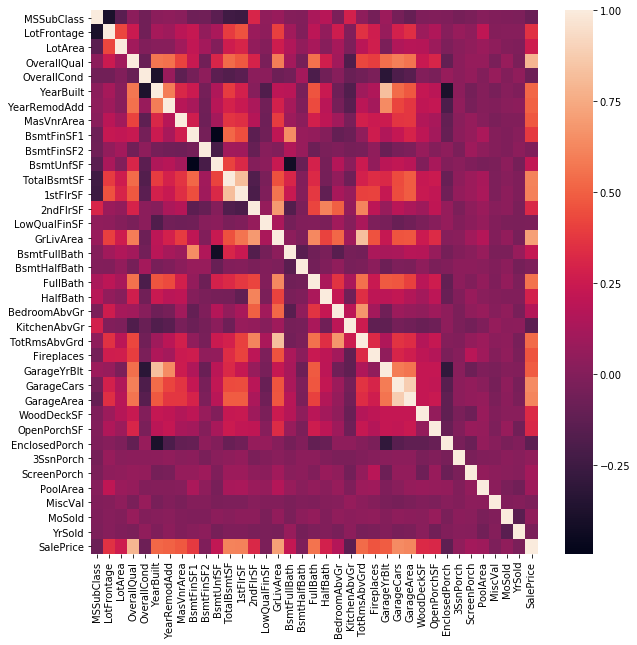

In [47]:
# 欠損の多いものとidの列をドロップ
dropped_df_train = df_train.dropna(axis = 1, thresh = 1000).drop(['Id'], axis=1)

#相関係数行列を作成
corr_df_train = dropped_df_train.corr()

#図を拡大する
plt.figure(figsize=(10,10))

#ヒートマップを作成
sns.heatmap(corr_df_train)

相関係数が高い関係
- GarageYrBltとYearBuilt
- GarageAreaとGarageCars  など

<br>
<br>

- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る

In [48]:
# 目的変数の相関係数上位10を抜き出す(目的変数はdrop)
high_corr = corr_df_train['SalePrice'].sort_values(ascending = False)[:11].drop(['SalePrice'])

print(high_corr)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


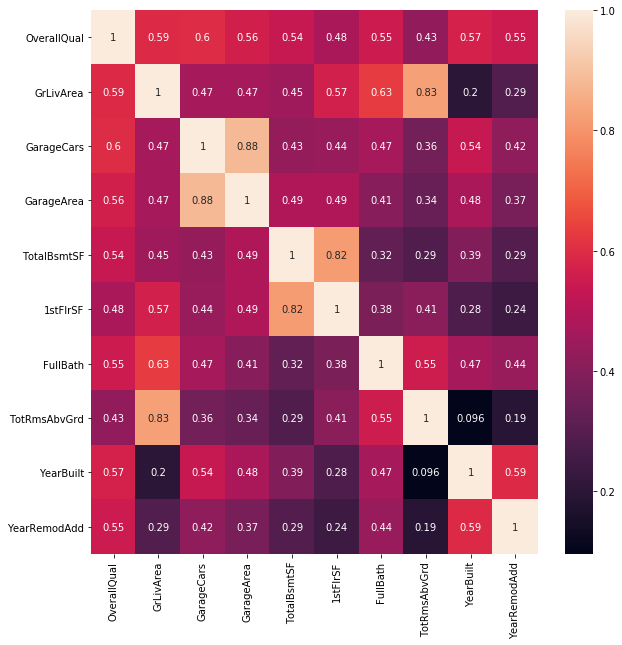

In [13]:
#相関係数行列を作成
high_corr_df_train = dropped_df_train[high_corr.index].corr()

#図を拡大する
plt.figure(figsize=(10,10))

#ヒートマップを作成
sns.heatmap(high_corr_df_train, annot = True)

- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

1. OverallQual  
家の品質を１０段階で表示（1:とてもひどい〜10:とても素晴らしい）
1. GrLivArea  
居住エリアの面積、延べ床面積（平方フィート）
1. GarageCars  
車庫に入る車の数を表示
1. GarageArea  
車庫の面積（平方フィート）
1. TotalBsmtSF  
地下の面積（平方フィート）
1. 1stFlrSF  
建物１階の面積（平方フィート）
1. FullBath  
フルバスルーム(浴槽・シャワー・洗面台・便器の4点が備え付けられた部屋)の数
1. TotRmsAbvGrd  
バスルームを除いた部屋の数
1. YearBuilt  
竣工年
1. YearRemodAdd  
改築した年（改築していない場合、竣工年と同じ年を表示）

- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

In [49]:
# 各行の最大値から3つ探し出せないかやってみる

# 相関係数が1の場合は、0でマスクする
masked_corr_df_train = high_corr_df_train.mask(corr_df_train == 1, 0)

# 各行で最大値をとる組み合わせ
high_corr = masked_corr_df_train.idxmax()

for high_corr_key in high_corr:
    print(high_corr_key + ' × ' + high_corr[high_corr_key])
    print(corr_df_train[high_corr_key][high_corr[high_corr_key]])

GarageCars × GarageArea
0.8824754142814603
TotRmsAbvGrd × GrLivArea
0.8254893743088377
GarageArea × GarageCars
0.8824754142814603
GarageCars × GarageArea
0.8824754142814603
1stFlrSF × TotalBsmtSF
0.8195299750050355
TotalBsmtSF × 1stFlrSF
0.8195299750050355
GrLivArea × TotRmsAbvGrd
0.8254893743088377
GrLivArea × TotRmsAbvGrd
0.8254893743088377
YearRemodAdd × YearBuilt
0.5928549763436497
YearBuilt × YearRemodAdd
0.5928549763436497


上記から 
1.  
GarageCars × GarageArea
0.8824754142814603  
2.  
TotRmsAbvGrd × GrLivArea
0.8254893743088377  
3.  
1stFlrSF × TotalBsmtSF
0.8195299750050355

# 【課題8】重要度の算出

In [53]:
from sklearn.ensemble import RandomForestRegressor

# 文字列をワンホット化
df_train = pd.get_dummies(df_train)

#  欠損を中央値で埋める
df_train = df_train.fillna(df_train.median())

# df_train.head()
# df_train.isnull().any()

# 説明変数
X = df_train.drop(['Id', 'SalePrice'], axis = 1)

# 目的変数
y = df_train['SalePrice']


# インスタンス作成
regr = RandomForestRegressor(n_estimators = 10)

# 学習
regr = regr.fit(X, y)

# 重要度取得
feature_importance = regr.feature_importances_

for i, key in enumerate(X):
    print('{} : {:.15f}'.format(key, feature_importance[i]))

MSSubClass : 0.002090989587552
LotFrontage : 0.005137724443753
LotArea : 0.014237268735285
OverallQual : 0.554887717202028
OverallCond : 0.004771689149250
YearBuilt : 0.008941013741148
YearRemodAdd : 0.005469441855685
MasVnrArea : 0.002570896445390
BsmtFinSF1 : 0.031739222776311
BsmtFinSF2 : 0.000635105452246
BsmtUnfSF : 0.007286556019406
TotalBsmtSF : 0.030702865849975
1stFlrSF : 0.032748950999386
2ndFlrSF : 0.022131325795375
LowQualFinSF : 0.000054734322010
GrLivArea : 0.102817712951156
BsmtFullBath : 0.001369692003335
BsmtHalfBath : 0.000102628394649
FullBath : 0.019150523063101
HalfBath : 0.000311029209736
BedroomAbvGr : 0.000907298057061
KitchenAbvGr : 0.001681850758455
TotRmsAbvGrd : 0.002340699767931
Fireplaces : 0.003846228282843
GarageYrBlt : 0.007322973743892
GarageCars : 0.020639601151792
GarageArea : 0.024702475164261
WoodDeckSF : 0.003467516229326
OpenPorchSF : 0.005230498324502
EnclosedPorch : 0.000289076002179
3SsnPorch : 0.000000707057733
ScreenPorch : 0.000208053655293